### MNIST Digits - Classification Using KNN


In [17]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import torchvision

In [1]:


train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True,
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False)

/Users/amberm/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/amberm/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b)
  Referenced from: '/Users/amberm/anaconda3/lib/python3.9/site-packages/torchvision/image.so'
  Expected in: '/Users/amberm/anaconda3/lib/python3.9/site-packages/torch/lib/libc10.dylib''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:

training_data = train_dataset.train_data.numpy()[:5000].reshape(5000, -1)
# (5000, 28, 28) -> (5000, 784)
training_label = train_dataset.train_labels[:5000].numpy()

test_data = test_dataset.test_data.numpy()[:5000].reshape(5000, -1)
test_label = test_dataset.test_labels[:5000].numpy()

/Users/amberm/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/amberm/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/amberm/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/amberm/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [4]:
#Print training data size
print('Training data size: ', training_data.shape)
print('Training data label size:', training_label.shape)
print('Training data size: ', test_data.shape)
print('Training data label size:', test_label.shape)

Training data size:  (5000, 784)
Training data label size: (5000,)
Training data size:  (5000, 784)
Training data label size: (5000,)


In [58]:

total_clusters = len(np.unique(training_label))
print(total_clusters)

kmeans = KMeans(n_clusters = total_clusters)

# train the classifier
kmeans.fit(training_data)


10


/Users/amberm/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [59]:
# Accuracy
from sklearn import metrics
y_pred = kmeans.predict(test_data)

print("Accuracy without best param:", metrics.accuracy_score(y_true=test_label, y_pred=y_pred), "\n")


Accuracy without best param: 0.1814 



/Users/amberm/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amberm/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amberm/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amberm/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

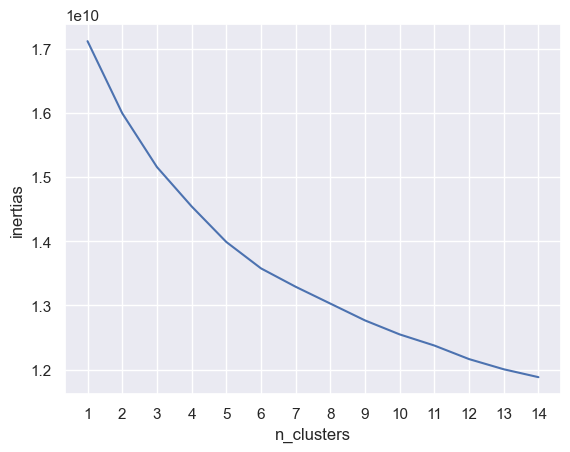

In [27]:
import pandas as pd
import seaborn as sns; sns.set()

inertias = []
n_clusters = range(1,15)
for i in n_clusters:
    kmeans = KMeans(i)
    kmeans.fit(training_data)
    inertias.append(kmeans.inertia_)

elbow_plot = pd.DataFrame({'n_clusters': n_clusters, 'inertias': inertias })
sns.lineplot(x='n_clusters', y='inertias', data=elbow_plot);
plt.xticks(n_clusters);

Find the best parameters of the model

In [7]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)


hyper_params = [
    {"weights": ["uniform", "distance"],
     "n_neighbors": [2, 3, 5, 7]
    }
]

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = knn,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)


In [8]:
# fit the model
model_cv.fit(training_data, training_label)

# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best test score is 0.942 corresponding to hyperparameters {'n_neighbors': 3, 'weights': 'distance'}
